# Importing the library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Importing Data

In [2]:
data = pd.read_excel('../input/startupexpansion/startup-expansion.xlsx')
data.head()

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887


# Preprocessing Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [4]:
data.isna().sum()
# there is no null data

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
dtype: int64

# EDA

In [5]:
data_dec = data[['Marketing Spend', 'Revenue']]
data_dec.describe().round(2)

,Marketing Spend,Revenue
count,150.00,150.00
mean,2893.15,39301.43
std,367.86,15465.75
min,1811.00,15562.00
25%,2662.25,21113.50
50%,2898.00,42993.00
75%,3111.50,51145.50
max,3984.00,68828.00


In [6]:
data.duplicated().sum()

0

In [7]:
data.columns

Index(['Store ID', 'City', 'State', 'Sales Region', 'New Expansion',
       'Marketing Spend', 'Revenue'],
      dtype='object')

In [8]:
city_unique = data['City'].unique()
state_unique = data['State'].unique()
sales_region_unique = data['Sales Region'].unique()
new_expansion_unique = data['New Expansion'].unique()

In [9]:
city_value_counts = data['City'].value_counts()
state_value_counts = data['State'].value_counts()
sales_region_value_counts = data['Sales Region'].value_counts()
new_expansion_value_counts = data['New Expansion'].value_counts()

In [10]:
new_expansion_value_counts

Old    140
New     10
Name: New Expansion, dtype: int64

In [11]:
state_value_counts

California        40
Texas             17
Florida           12
Washington         7
Colorado           5
Illinois           5
Georgia            4
Alabama            4
Connecticut        4
New Jersey         4
Arizona            3
Tennessee          3
Iowa               3
Michigan           3
South Carolina     3
Utah               3
Massachusetts      3
Kansas             3
New York           3
Louisiana          2
North Carolina     2
Ohio               2
Virginia           2
Oregon             2
Mississippi        1
New Mexico         1
Arkansas           1
New Hampshire      1
Oklahoma           1
Montana            1
Indiana            1
South Dakota       1
Minnesota          1
Wisconsin          1
Rhode Island       1
Name: State, dtype: int64

In [12]:
sales_region_value_counts

Region 2    86
Region 1    64
Name: Sales Region, dtype: int64

In [13]:
data.groupby('Sales Region')['Revenue'].mean()

Sales Region
Region 1    40567.203125
Region 2    38359.465116
Name: Revenue, dtype: float64

<AxesSubplot:xlabel='Sales Region', ylabel='count'>

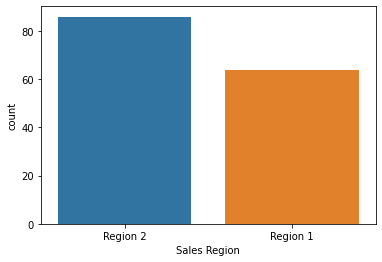

In [14]:
sns.countplot(x='Sales Region', data=data)

<AxesSubplot:xlabel='Sales Region', ylabel='Revenue'>

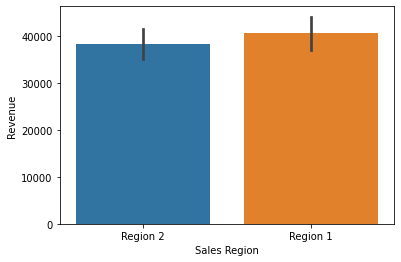

In [15]:
sns.barplot(x='Sales Region', y='Revenue', data=data)

In [16]:
data.groupby('Sales Region')[['Marketing Spend','Revenue']].mean()

,Marketing Spend,Revenue
Sales Region,,
Region 1,2889.000000,40567.203125
Region 2,2896.232558,38359.465116


<AxesSubplot:xlabel='Sales Region', ylabel='Marketing Spend'>

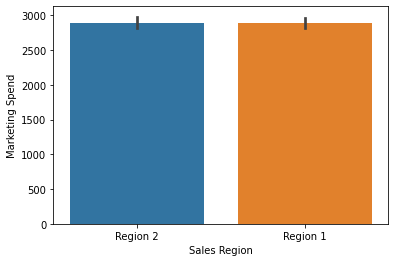

In [17]:
sns.barplot(x='Sales Region', y='Marketing Spend', data=data)

In [18]:
data_city_revenue = data.groupby(['City', 'State', 'Sales Region'])['Revenue'].mean().sort_values(ascending=False)
data_city_revenue = pd.DataFrame(data_city_revenue)
data_city_revenue

,,,Revenue
City,State,Sales Region,
Little Rock,Arkansas,Region 2,68828.0
Grand Rapids,Michigan,Region 1,65475.0
Rochester,New York,Region 1,64906.0
Oxnard,California,Region 2,64302.0
Brownsville,Texas,Region 2,63148.0
...,...,...,...
Ventura,California,Region 2,16652.0
Murrieta,California,Region 2,16372.0
Lewisville,Texas,Region 2,16029.0


<Figure size 2160x1440 with 0 Axes>

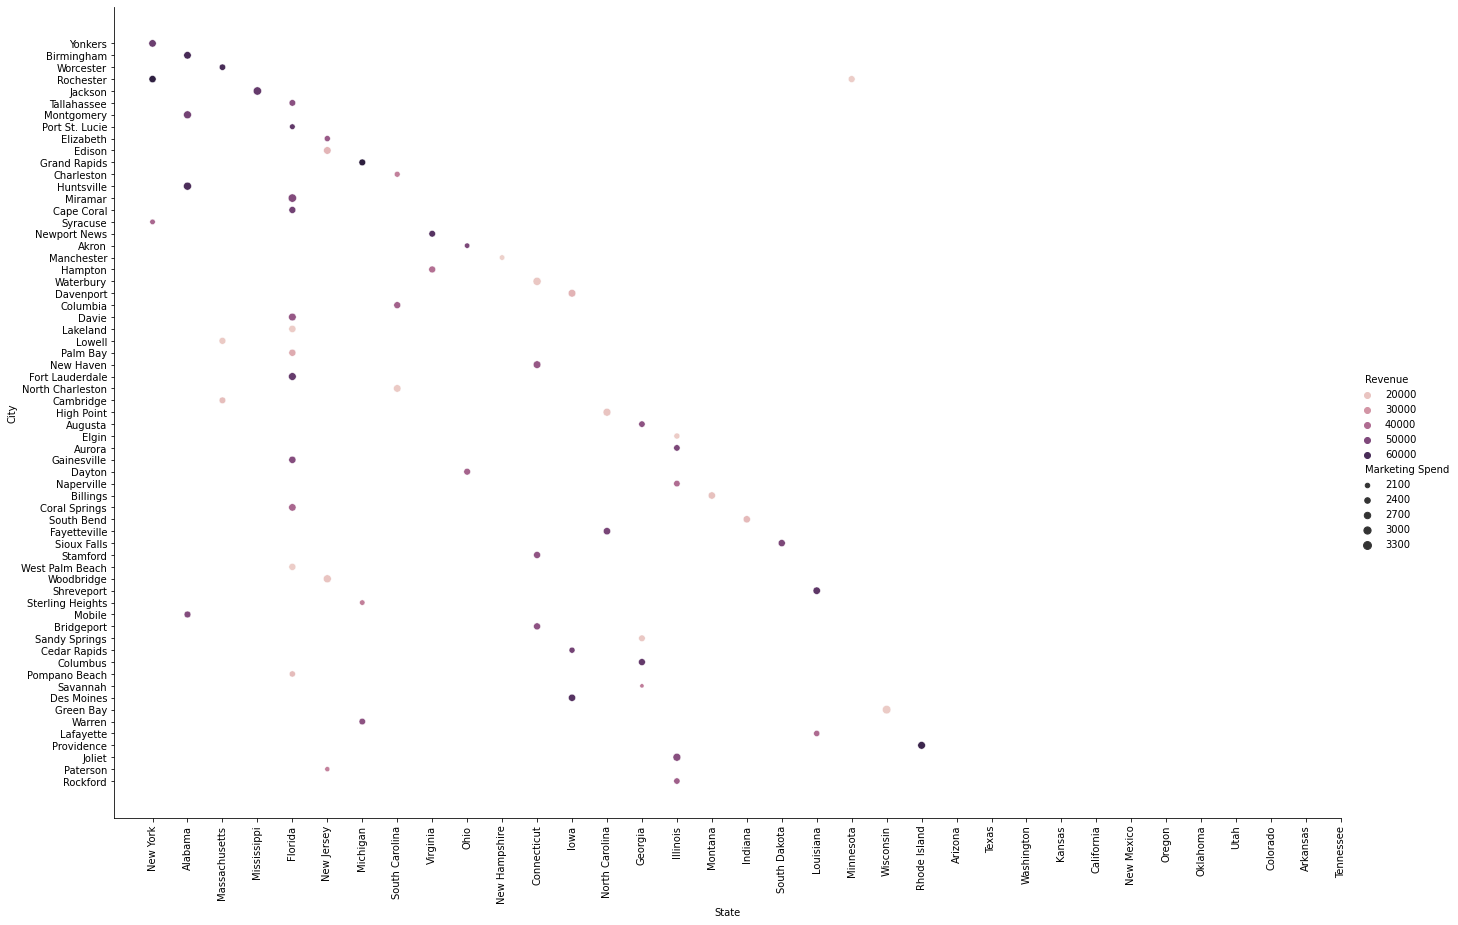

In [19]:
data_reg_1 = data[data['Sales Region'] == 'Region 1']
plt.figure(figsize=(30, 20))
sns.relplot(y='City', x='State', data=data_reg_1, hue='Revenue', size='Marketing Spend', kind='scatter',height=12, aspect=19/12)
plt.xticks(state_unique,rotation=90)
plt.show()

<Figure size 2160x1440 with 0 Axes>

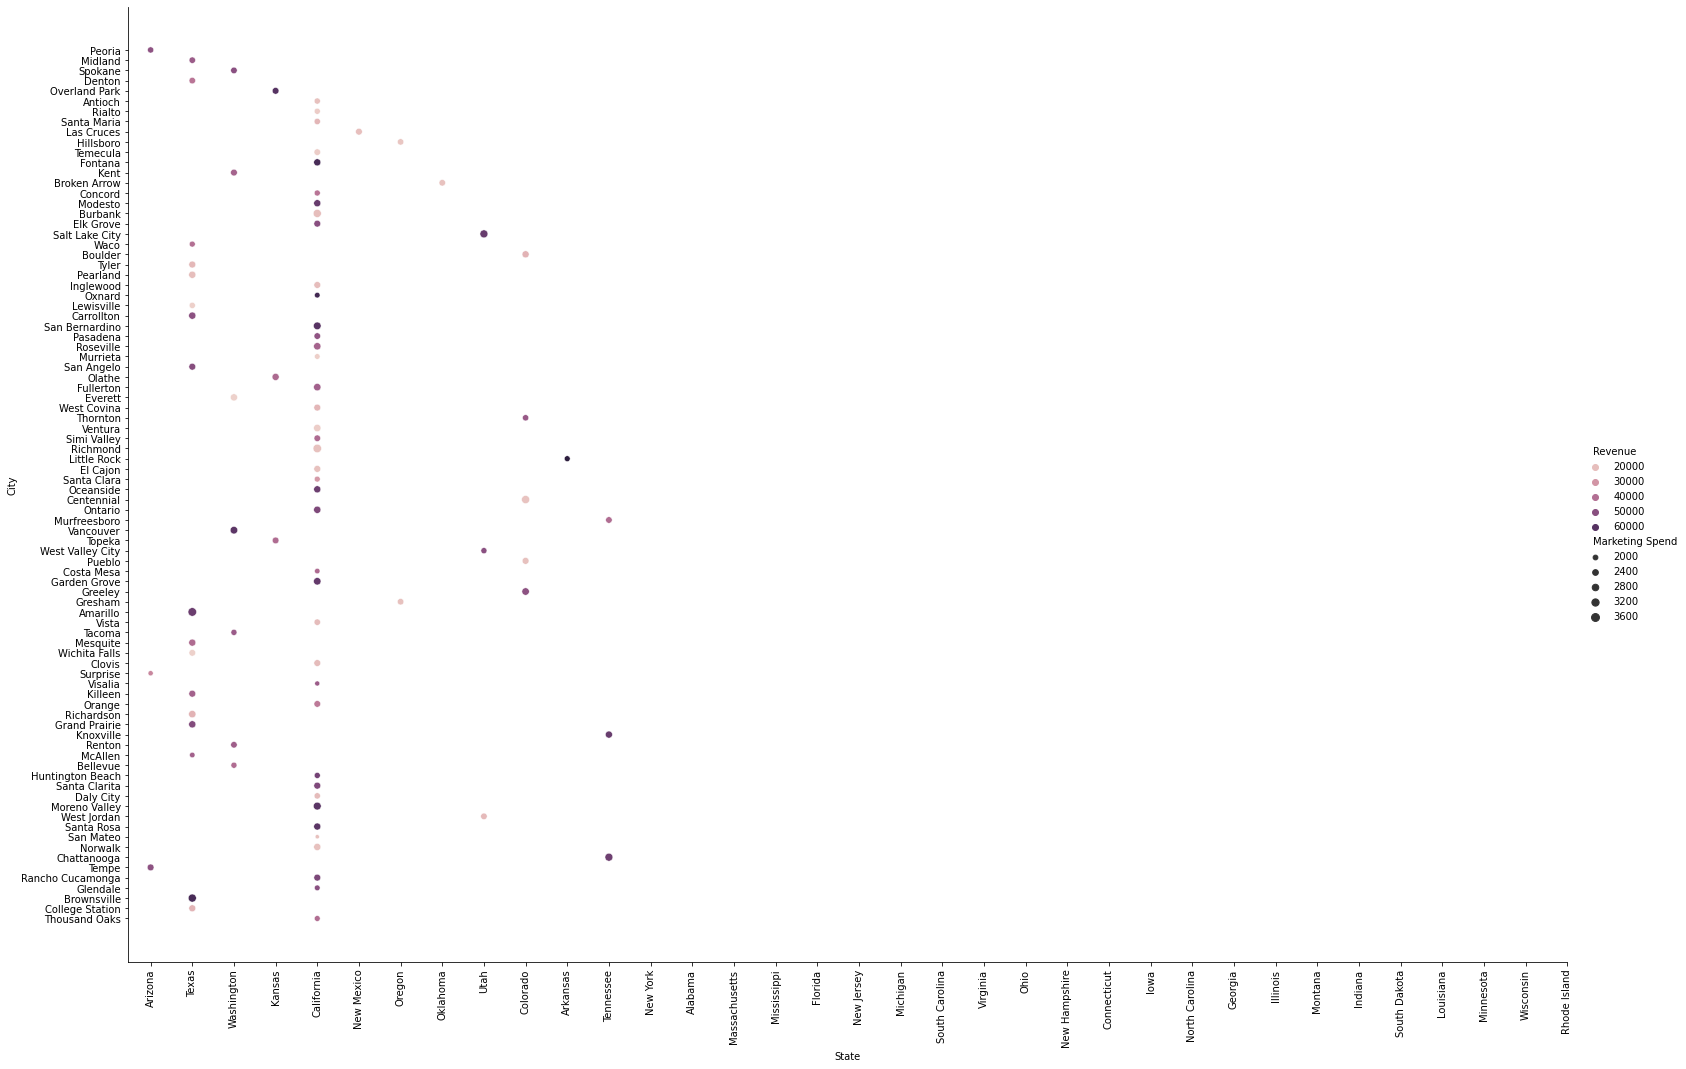

In [20]:
data_reg_2 = data[data['Sales Region'] == 'Region 2'] 
plt.figure(figsize=(30, 20))
sns.relplot(y='City', x='State', data=data_reg_2, hue='Revenue', size='Marketing Spend', kind='scatter',height=14, aspect=19/12)
plt.xticks(state_unique,rotation=90)
plt.show()

#### From these 2 plots we can see in region_1 no markiting spend in Califoronia and in reg_2 there is alot of marketing spend in Califoronia and this is explanation leading to: Why is a revenue in Region_2 more than Region_1 ?

In [21]:
data_reg_1['State'].isin(['California']).sum()

0

In [22]:
data_reg_2['State'].isin(['California']).sum()

40

In [23]:
data.head()

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887


* Calculate the Profit and ROMS

In [24]:
data['Profit'] = data['Revenue'] - data['Marketing Spend']

In [25]:
data['ROMS'] = round((data['Profit'] / data['Marketing Spend']) * 100, 2)

* Largest Revenue in all data 

In [26]:
data.nlargest(1, columns='Revenue')

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS
63,64,Little Rock,Arkansas,Region 2,Old,2440,68828,66388,2720.82


* Smallest Revenue in all data 

In [27]:
data.nsmallest(1, columns='Revenue')

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS
53,54,Everett,Washington,Region 2,Old,3129,15562,12433,397.35


* Largest Revenue in all Region_1  

In [28]:
data_reg_1.nlargest(1, columns='Revenue')

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
31,32,Grand Rapids,Michigan,Region 1,Old,2808,65475


* Largest Revenue in all Region_2

In [29]:
data_reg_2.nlargest(1, columns='Revenue')

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
63,64,Little Rock,Arkansas,Region 2,Old,2440,68828


* Smallest Revenue in all Region_1

In [30]:
data_reg_1.nsmallest(1, columns='Revenue')

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
52,53,Manchester,New Hampshire,Region 1,Old,2374,17006


* Smallest Revenue in all Region_2

In [31]:
data_reg_2.nsmallest(1, columns='Revenue')

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
53,54,Everett,Washington,Region 2,Old,3129,15562


* Smallest Marketing Spend in all data

In [32]:
data[data['Marketing Spend'] == min(data['Marketing Spend'])]

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS
135,136,San Mateo,California,Region 2,Old,1811,19426,17615,972.67


* Smallest Marketing Spend in Region_1

In [33]:
data_reg_1.nsmallest(1, columns='Marketing Spend')

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
130,131,Savannah,Georgia,Region 1,Old,2028,36029


* Smallest Marketing Spend in Region_2

In [34]:
data_reg_2.nsmallest(1, columns='Marketing Spend')

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
135,136,San Mateo,California,Region 2,Old,1811,19426


* Largest Marketing Spend in data

In [35]:
data.nlargest(1, columns='Marketing Spend')

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS
86,87,Amarillo,Texas,Region 2,Old,3984,56089,52105,1307.86


* Largest Marketing Spend in all Region_1

In [36]:
data_reg_1.nlargest(1, columns='Marketing Spend')

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
133,134,Green Bay,Wisconsin,Region 1,Old,3586,18454


* Largest Marketing Spend in all Region_2

In [37]:
data_reg_2.nlargest(1, columns='Marketing Spend')

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
86,87,Amarillo,Texas,Region 2,Old,3984,56089


In [38]:
data.to_csv('I:\Python\dataSet\ml\startup_expansion\startup-expansion.csv')